In [1]:
import pandas as pd
import utils_numeric as un
hotel = pd.read_csv('./hotel_bookings.csv')
hotel = hotel.drop(columns=['country','agent','company'])
col_out = 'is_canceled'

In [2]:
hmd = un.NumericColsWEncoding(hotel)
hotel_nonull = hmd.extract_numeric_cols()
hotel_nonull.loc[hotel_nonull[hotel_nonull['children'].isnull()].index, 'children'] = 1.0

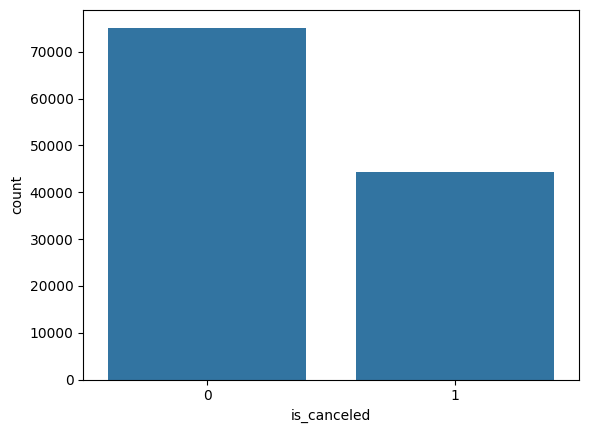

0 비율: 62.96%
1 비율: 37.04%


In [5]:
# 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
sns.countplot(x=col_out, data = hotel_nonull)
plt.show()

ratio0 = round(len(hotel_nonull[hotel_nonull[col_out]==0])/len(hotel_nonull)*100, 2)
ratio1 = round(len(hotel_nonull[hotel_nonull[col_out]==1])/len(hotel_nonull)*100, 2)
print(f'0 비율: {ratio0}%')
print(f'1 비율: {ratio1}%')

#### 클래스불균형 해소법

In [7]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time
start = time.time()
x = hotel_nonull[hotel_nonull.columns.difference([col_out])]
y = hotel_nonull[col_out]
#SMOTE
sm = SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(x, y)
print(f'time: {time.time()-start}')

time: 1.1703710556030273


#### 정확도와 속도측면

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
start = time.time()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = 100)

clf = RandomForestClassifier(n_estimators = 100, min_samples_split=10)
clf.fit(x_train, y_train)
print(f'train accuracy : {clf.score(x_train, y_train)}')
pred = clf.predict(x_test)
print(classification_report(y_test,pred))
print('time : ', time.time()-start)

train accuracy : 0.9377669821593099
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     15033
           1       0.85      0.70      0.77      8845

    accuracy                           0.84     23878
   macro avg       0.85      0.81      0.83     23878
weighted avg       0.84      0.84      0.84     23878

time :  9.127625942230225
